In [1]:
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns

In [33]:
df=pd.read_csv("C:\\Users\\saran\\Downloads\\seattle-weather.csv")

In [34]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


<Axes: xlabel='precipitation', ylabel='Count'>

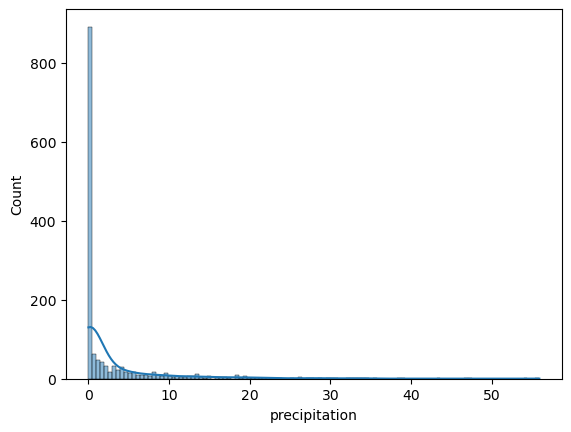

In [35]:
sns.histplot(df['precipitation'], kde=True)

In [36]:
df['precipitation'].describe()


count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [37]:
for col in ['temp_max','temp_min','wind']:
    df[f'{col}_d'] = pd.qcut(df[col], q=4, labels=['low', 'medium', 'high', 'veryhigh'])


In [38]:
df.head()

,date,precipitation,temp_max,temp_min,wind,weather,temp_max_d,temp_min_d,wind_d
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle,medium,medium,veryhigh
1,2012-01-02,10.9,10.6,2.8,4.5,rain,low,low,veryhigh
2,2012-01-03,0.8,11.7,7.2,2.3,rain,medium,medium,medium
3,2012-01-04,20.3,12.2,5.6,4.7,rain,medium,medium,veryhigh
4,2012-01-05,1.3,8.9,2.8,6.1,rain,low,low,veryhigh


In [39]:
df.describe()


,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [40]:
def precipitation_discretizer(value):
    if value<=2.80:
        return 'low'
    elif value>2.80 and value<=6.80:
        return 'medium'
    else:
        return 'high'

In [41]:
df['precipitation_d']=df['precipitation'].apply(precipitation_discretizer)

In [44]:
X=df[['weather','temp_max_d',	'temp_min_d',	'wind_d',	'precipitation_d']]

In [45]:
X.head()

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d
0,drizzle,medium,medium,veryhigh,low
1,rain,low,low,veryhigh,high
2,rain,medium,medium,medium,low
3,rain,medium,medium,veryhigh,high
4,rain,low,low,veryhigh,low


In [46]:
X['weather'].value_counts()

weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64

In [54]:
X.dtypes

weather              object
temp_max_d         category
temp_min_d         category
wind_d             category
precipitation_d      object
dtype: object

In [55]:
X = X.astype(str)

In [56]:
X.dtypes

weather            object
temp_max_d         object
temp_min_d         object
wind_d             object
precipitation_d    object
dtype: object

In [60]:
X['concat_col']=X['weather']+'_'+ X['precipitation_d']+'_'+ X['wind_d']+'_'+ X['temp_max_d']+ '_'+ X['temp_min_d']  

In [61]:
X

,weather,temp_max_d,temp_min_d,wind_d,precipitation_d,concat_col
0,drizzle,medium,medium,veryhigh,low,drizzle_low_veryhigh_medium_medium
1,rain,low,low,veryhigh,high,rain_high_veryhigh_low_low
2,rain,medium,medium,medium,low,rain_low_medium_medium_medium
3,rain,medium,medium,veryhigh,high,rain_high_veryhigh_medium_medium
4,rain,low,low,veryhigh,low,rain_low_veryhigh_low_low
...,...,...,...,...,...,...
1456,rain,low,low,medium,high,rain_high_medium_low_low
1457,rain,low,low,low,low,rain_low_low_low_low
1458,fog,low,low,medium,low,fog_low_medium_low_low
1459,sun,low,low,high,low,sun_low_high_low_low


In [48]:
!pip install hmmlearn

In [49]:
from hmmlearn.hmm import CategoricalHMM

In [50]:
model = CategoricalHMM(n_components=3)